In [170]:
import os
from glob import glob
from skimage import data, io, feature, color, exposure
import numpy as np
import cv2

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

import seaborn as sns
%matplotlib inline

In [171]:
radius = 2
n_points = 12 #* radius
method='uniform'

In [172]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
putin_01 = Path(lfw2_crop, 'Vladimir_Putin', 'Vladimir_Putin_0001.jpg')

In [173]:
img = plt.imread(putin_01)
# numPoints = 24
# radius = 3
# n_points = 8 * radius
# lbp = feature.local_binary_pattern(img, n_points, radius, method="uniform")

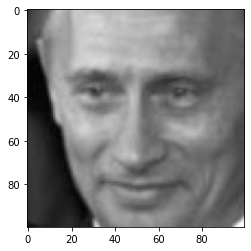

In [174]:
fig, ax = plt.subplots(1)
ax.imshow(img, cmap='gray')
# cv2.compareHist

In [175]:
def geraHist(img, n_points, radius, method):
    lbp = feature.local_binary_pattern(img, n_points, radius, method=method)
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
#         eps = 1e-6
        # normalize the histogram
    #     hist = hist.astype("float")
    #     hist /= (hist.sum() + eps)
    #     print(hist.shape)
#         hists.append(hist)
    return lbp, hist

<AxesSubplot:>

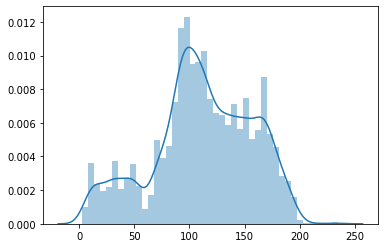

In [176]:
sns.distplot(img.ravel())

In [177]:
# pairs = geraPairs(img, grid_X, grid_Y)
lbp, hist = geraHist(img, n_points, radius, method)

<AxesSubplot:>

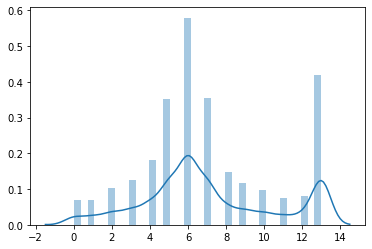

In [178]:
sns.distplot(lbp.ravel())

In [179]:
np.min(lbp), np.max(lbp)

(0.0, 13.0)

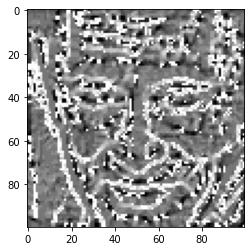

In [180]:
fig, ax = plt.subplots(1)
ax.imshow(lbp, cmap='gray')

In [181]:
hist.shape

(14,)

<BarContainer object of 14 artists>

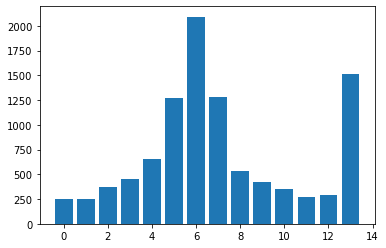

In [182]:
x = range(len(hist))
plt.bar(x, hist)

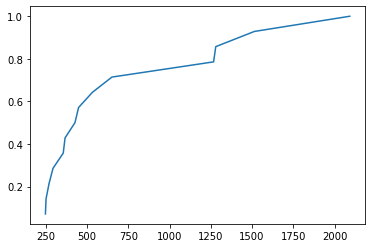

In [183]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf = ECDF(hist)
plt.plot(cdf.x, cdf.y, label="statmodels", markerfacecolor='none')

In [184]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
putin_21 = Path(lfw2_crop, 'Vladimir_Putin', 'Vladimir_Putin_0021.jpg')
img21 = plt.imread(putin_21)

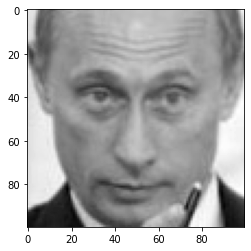

In [185]:
fig, ax = plt.subplots(1)
ax.imshow(img21, cmap='gray')

In [186]:
lbp21, hist21 = geraHist(img21, n_points, radius, method)

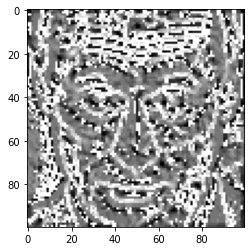

In [187]:
fig, ax = plt.subplots(1)
ax.imshow(lbp21, cmap='gray')

<BarContainer object of 14 artists>

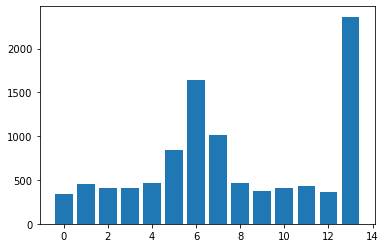

In [188]:
x = range(len(hist21))
plt.bar(x,hist21)

<AxesSubplot:>

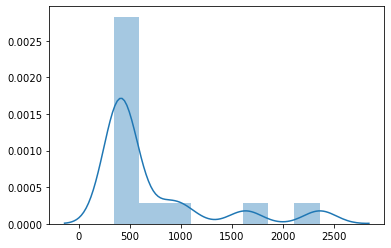

In [189]:
sns.distplot(hist21)

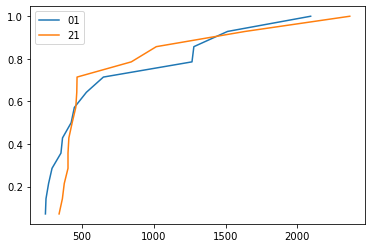

In [190]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf21 = ECDF(hist21)
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y,label='21')
plt.legend()

# testing Aaron Sorkin

In [191]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
aaron = Path(lfw2_crop, 'Aaron_Sorkin', 'Aaron_Sorkin_0001.jpg')
aaron = plt.imread(aaron)

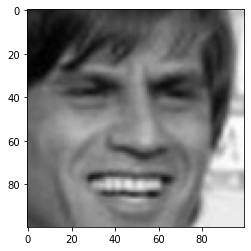

In [192]:
fig, ax = plt.subplots(1)
ax.imshow(aaron, cmap='gray')

In [193]:
lbpAaron, histAaron = geraHist(aaron, n_points, radius, method)

<BarContainer object of 14 artists>

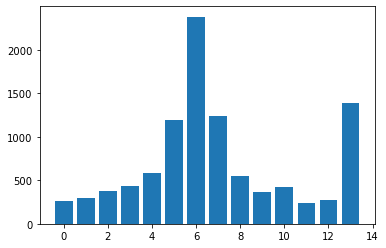

In [194]:
x = range(len(histAaron))
plt.bar(x,histAaron)

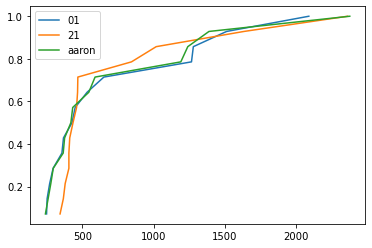

In [195]:
from statsmodels.distributions.empirical_distribution import ECDF
cdfaaronVals = ECDF(histAaron)
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y, label='21')
plt.plot(cdfaaronVals.x, cdfaaronVals.y, label='aaron')
plt.legend()

In [196]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdfaaronVals.x, cdfaaronVals.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

347.0

In [197]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

422.0

In [198]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdfaaronVals.x, cdfaaronVals.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

288.0

# testing Aaron Sorkin 2

In [199]:
lfw2_crop = os.path.join('..', 'Data', 'lfw2_cropped')
aaron2 = Path(lfw2_crop, 'Aaron_Sorkin', 'Aaron_Sorkin_0002.jpg')
aaron2 = plt.imread(aaron2)

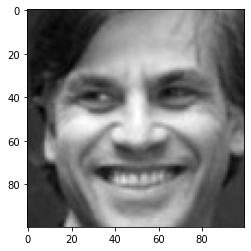

In [200]:
fig, ax = plt.subplots(1)
ax.imshow(aaron2, cmap='gray')

In [201]:
lbpAaron2, histsAaron2 = geraHist(aaron2, n_points, radius, method)

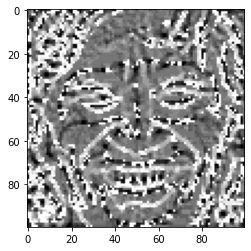

In [202]:
fig, ax = plt.subplots(1)
ax.imshow(lbpAaron2, cmap='gray')

<BarContainer object of 14 artists>

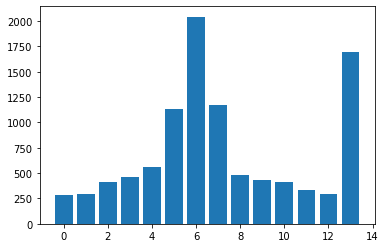

In [203]:
x = range(len(histsAaron2))
plt.bar(x,histsAaron2)

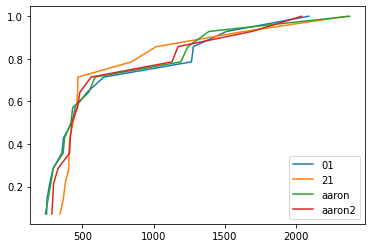

In [158]:
from statsmodels.distributions.empirical_distribution import ECDF
cdfaaronVals2 = ECDF(histsAaron2)
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y, label='21')
plt.plot(cdfaaronVals.x, cdfaaronVals.y, label='aaron')
plt.plot(cdfaaronVals2.x, cdfaaronVals2.y, label='aaron2')
plt.legend()

(-1.0, 10.0)

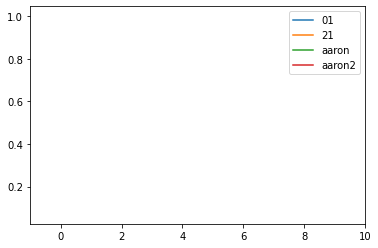

In [159]:
plt.plot(cdf.x, cdf.y, label='01')
plt.plot(cdf21.x, cdf21.y, label='21')
plt.plot(cdfaaronVals.x, cdfaaronVals.y, label='aaron')
plt.plot(cdfaaronVals2.x, cdfaaronVals2.y, label='aaron2')
plt.legend()
plt.xlim(-1,10)

In [160]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdfaaronVals.x, cdfaaronVals.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

347.0

In [161]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdf21.x, cdf21.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

422.0

In [162]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdfaaronVals.x, cdfaaronVals.y
B_x, B_y = cdf.x, cdf.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

288.0

In [163]:
# dist = np.linalg.norm(a-b)
A_x, A_y = cdfaaronVals.x, cdfaaronVals.y
B_x, B_y = cdfaaronVals2.x, cdfaaronVals2.y
dists = []
for i in range(1,len(A_x)):
    a = np.array(A_x[i], A_y[i])
    b = np.array(B_x[i], B_y[i])
    dists.append(np.linalg.norm(a-b))
np.max(dists)

338.0

In [164]:
np.sum(np.abs(histAaron - histsAaron2))

1138

In [165]:
np.sum(np.abs(hist - hist21))

2950

In [166]:
np.sum(np.abs(histAaron - hist))

850

In [167]:
np.sum(np.abs(histsAaron2 - hist21))

2142